# Вступ до машинного навчання

Джерела: \
https://github.com/amueller/introduction_to_ml_with_python

## Демостраційна частина

In [1]:
# перший виклик matplotlib займає певний час, це нормально
%matplotlib inline

### Essential Libraries and Tools

#### NumPy

In [2]:
import numpy as np

x = np.array([[1, 2, 3], [4, 5, 6]])
print("x:\n{}".format(x))

x:
[[1 2 3]
 [4 5 6]]


#### SciPy

In [3]:
from scipy import sparse

# Create a 2D NumPy array with a diagonal of ones, and zeros everywhere else
eye = np.eye(4)
print("NumPy array:\n", eye)

NumPy array:
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [4]:
# Convert the NumPy array to a SciPy sparse matrix in CSR format
# Only the nonzero entries are stored
sparse_matrix = sparse.csr_matrix(eye)
print("\nSciPy sparse CSR matrix:\n", sparse_matrix)


SciPy sparse CSR matrix:
   (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


In [5]:
data = np.ones(4)
row_indices = np.arange(4)
col_indices = np.arange(4)
eye_coo = sparse.coo_matrix((data, (row_indices, col_indices)))
print("COO representation:\n", eye_coo)

COO representation:
   (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


#### matplotlib

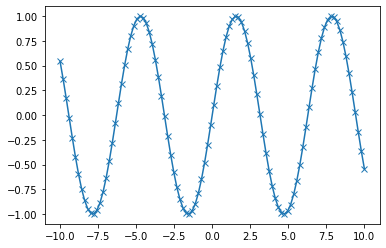

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

# Generate a sequence of numbers from -10 to 10 with 100 steps in between
x = np.linspace(-10, 10, 100)
# Create a second array using sine
y = np.sin(x)
# The plot function makes a line chart of one array against another
plt.plot(x, y, marker="x")

#### pandas

In [7]:
import pandas as pd

# create a simple dataset of people
data = {'Name': ["John", "Anna", "Peter", "Linda"],
        'Location' : ["New York", "Paris", "Berlin", "London"],
        'Age' : [24, 13, 53, 33]
       }

data_pandas = pd.DataFrame(data)
# IPython.display allows "pretty printing" of dataframes
# in the Jupyter notebook
display(data_pandas)

,Name,Location,Age
0,John,New York,24
1,Anna,Paris,13
2,Peter,Berlin,53
3,Linda,London,33


In [8]:
# Select all rows that have an age column greater than 30
display(data_pandas[data_pandas.Age > 30])

,Name,Location,Age
2,Peter,Berlin,53
3,Linda,London,33


### Version check

In [9]:
import sys
print("Python version:", sys.version)

import pandas as pd
print("pandas version:", pd.__version__)

import matplotlib
print("matplotlib version:", matplotlib.__version__)

import numpy as np
print("NumPy version:", np.__version__)

import scipy as sp
print("SciPy version:", sp.__version__)

import IPython
print("IPython version:", IPython.__version__)

import sklearn
print("scikit-learn version:", sklearn.__version__)

Python version: 3.7.4 (default, Aug 13 2019, 20:35:49) 
[GCC 7.3.0]
pandas version: 1.1.2
matplotlib version: 3.3.2
NumPy version: 1.19.2
SciPy version: 1.5.2
IPython version: 7.18.1
scikit-learn version: 0.23.2


### A First Application: Classifying Iris Species
#### Meet the Data

In [10]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [11]:
print("Keys of iris_dataset:\n", iris_dataset.keys())

Keys of iris_dataset:
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [12]:
print(iris_dataset['DESCR'][:193] + "\n...")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre
...


In [13]:
print("Target names:", iris_dataset['target_names'])

Target names: ['setosa' 'versicolor' 'virginica']


In [14]:
print("Feature names:\n", iris_dataset['feature_names'])

Feature names:
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [15]:
print("Type of data:", type(iris_dataset['data']))

Type of data: <class 'numpy.ndarray'>


In [16]:
print("Shape of data:", iris_dataset['data'].shape)

Shape of data: (150, 4)


In [17]:
print("First five rows of data:\n", iris_dataset['data'][:5])

First five rows of data:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [18]:
print("Type of target:", type(iris_dataset['target']))

Type of target: <class 'numpy.ndarray'>


In [19]:
print("Shape of target:", iris_dataset['target'].shape)

Shape of target: (150,)


In [20]:
print("Target:\n", iris_dataset['target'])

Target:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


#### Measuring Success: Training and Testing Data

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)

In [22]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (112, 4)
y_train shape: (112,)


In [23]:
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_test shape: (38, 4)
y_test shape: (38,)


#### First Things First: Look at Your Data

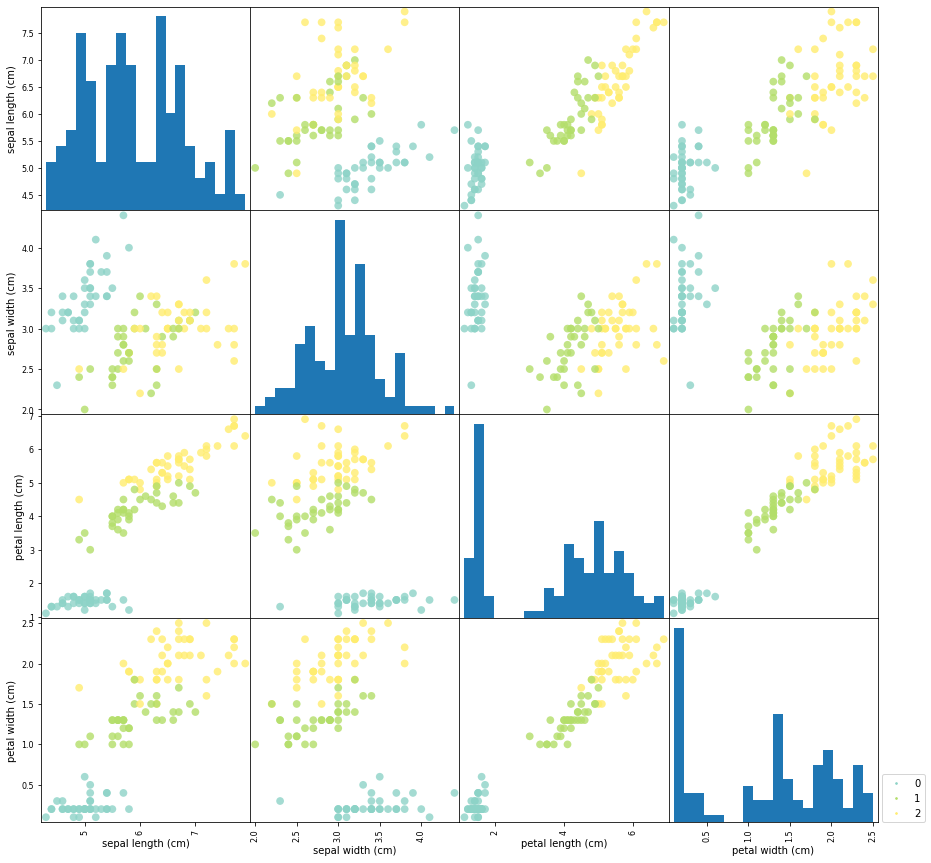

In [24]:
# create dataframe from data in X_train
# label the columns using the strings in iris_dataset.feature_names
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
# create a scatter matrix from the dataframe, color by y_train
grr = pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15),
                           marker='o', hist_kwds={'bins': 20}, s=60,
                           alpha=.8, cmap = 'Set3')
handles = [plt.plot([],[], color=plt.cm.Set3(i/2.), ls="", marker=".", \
                    markersize=np.sqrt(10))[0] for i in range(3)]
labels=np.unique(iris_dataset['target'])
plt.legend(handles, labels, loc=(1.02,0))
plt.show()

#### Building Your First Model: k-Nearest Neighbors

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [26]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

#### Making Predictions

In [27]:
X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape:", X_new.shape)

X_new.shape: (1, 4)


In [28]:
prediction = knn.predict(X_new)
print("Prediction:", prediction)
print("Predicted target name:",
       iris_dataset['target_names'][prediction])

Prediction: [0]
Predicted target name: ['setosa']


#### Evaluating the Model

In [29]:
y_pred = knn.predict(X_test)
print("Test set predictions:\n", y_pred)

Test set predictions:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [30]:
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

Test set score: 0.97


In [31]:
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.97


### Summary and Outlook

In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.97


## Завдання

### Частина І

1. Яку за типом задачу машинного навчання було розглянуто вище?

Відповідь: supervised learning, classification

2. Назвіть трійку <E,T,P>, що їй відповідає

Відповідь: E - Iris plants dataset, T - class prediction, P - accuracy (number of correctly predicted data points out of all)

3. На основі заданої вибірки, могли б Ви запропонувати іншу задачу машинного навчання? Яку?

Відповідь: clustering, if class wasn't known; regression to predict sepal/petal width/length

4. Прокоментуйте графіки (див. вище), що ілюструють ко-залежність ознак між собою

Відповідь: petal width and length are positively correlated for all classes of iris. Class 0 has significantly smaller petal width and length than others, also class 1 has slighly smaller petal width and length than class 2. There is also positive correlation between sepal length and petal length.

5. Наведіть приклади трьох задач навчання (заданих трійками <E,T,P>), відмінні від наведених на лекції

Відповідь: 

1) E - data from the first 24 hours of intensive care, T - predict probability of patient survival, P - ROC AUC

2) E - data about workers and history of their turnover, T - employees dissmisal next month, P - f-beta score

3) E - monthly sales history of retail stores, T - forecast sales for the next 12 months, P - MAE

### Частина II

Повторіть приготування набору даних до тренування моделі для вибірки про класифікацію вина. Не зневажайте переглядом описового файлу. Напишіть власний короткий опис до датасету, використовуючи знання, отримані при дослідженні вибірки (щонайменше 7 речень).

In [33]:
from sklearn.datasets import load_wine

### Read data

In [34]:
wine_dataset = load_wine()

### Data description

In [35]:
print("Keys of iris_dataset:\n", wine_dataset.keys())

Keys of iris_dataset:
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])


In [36]:
print(wine_dataset['DESCR'].split('This is a copy of UCI ML Wine recognition datasets')[0])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [37]:
print("Target names:", wine_dataset['target_names'])

print("Feature names:\n", wine_dataset['feature_names'])

print("Type of data:", type(wine_dataset['data']))

print("Shape of data:", wine_dataset['data'].shape)

print("First five rows of data:\n", wine_dataset['data'][:5])

print("Type of target:", type(wine_dataset['target']))

print("Shape of target:", wine_dataset['target'].shape)

print("Target:\n", wine_dataset['target'])

Target names: ['class_0' 'class_1' 'class_2']
Feature names:
 ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Type of data: <class 'numpy.ndarray'>
Shape of data: (178, 13)
First five rows of data:
 [[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
 [1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
  3.900e-01 1.820e+00 4.320

### Train/Test split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(
    wine_dataset['data'], wine_dataset['target'], stratify =wine_dataset['target'],  random_state=0)

X_train = pd.DataFrame(X_train, columns=wine_dataset.feature_names)
X_test = pd.DataFrame(X_test, columns=wine_dataset.feature_names)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (133, 13)
y_train shape: (133,)
X_test shape: (45, 13)
y_test shape: (45,)


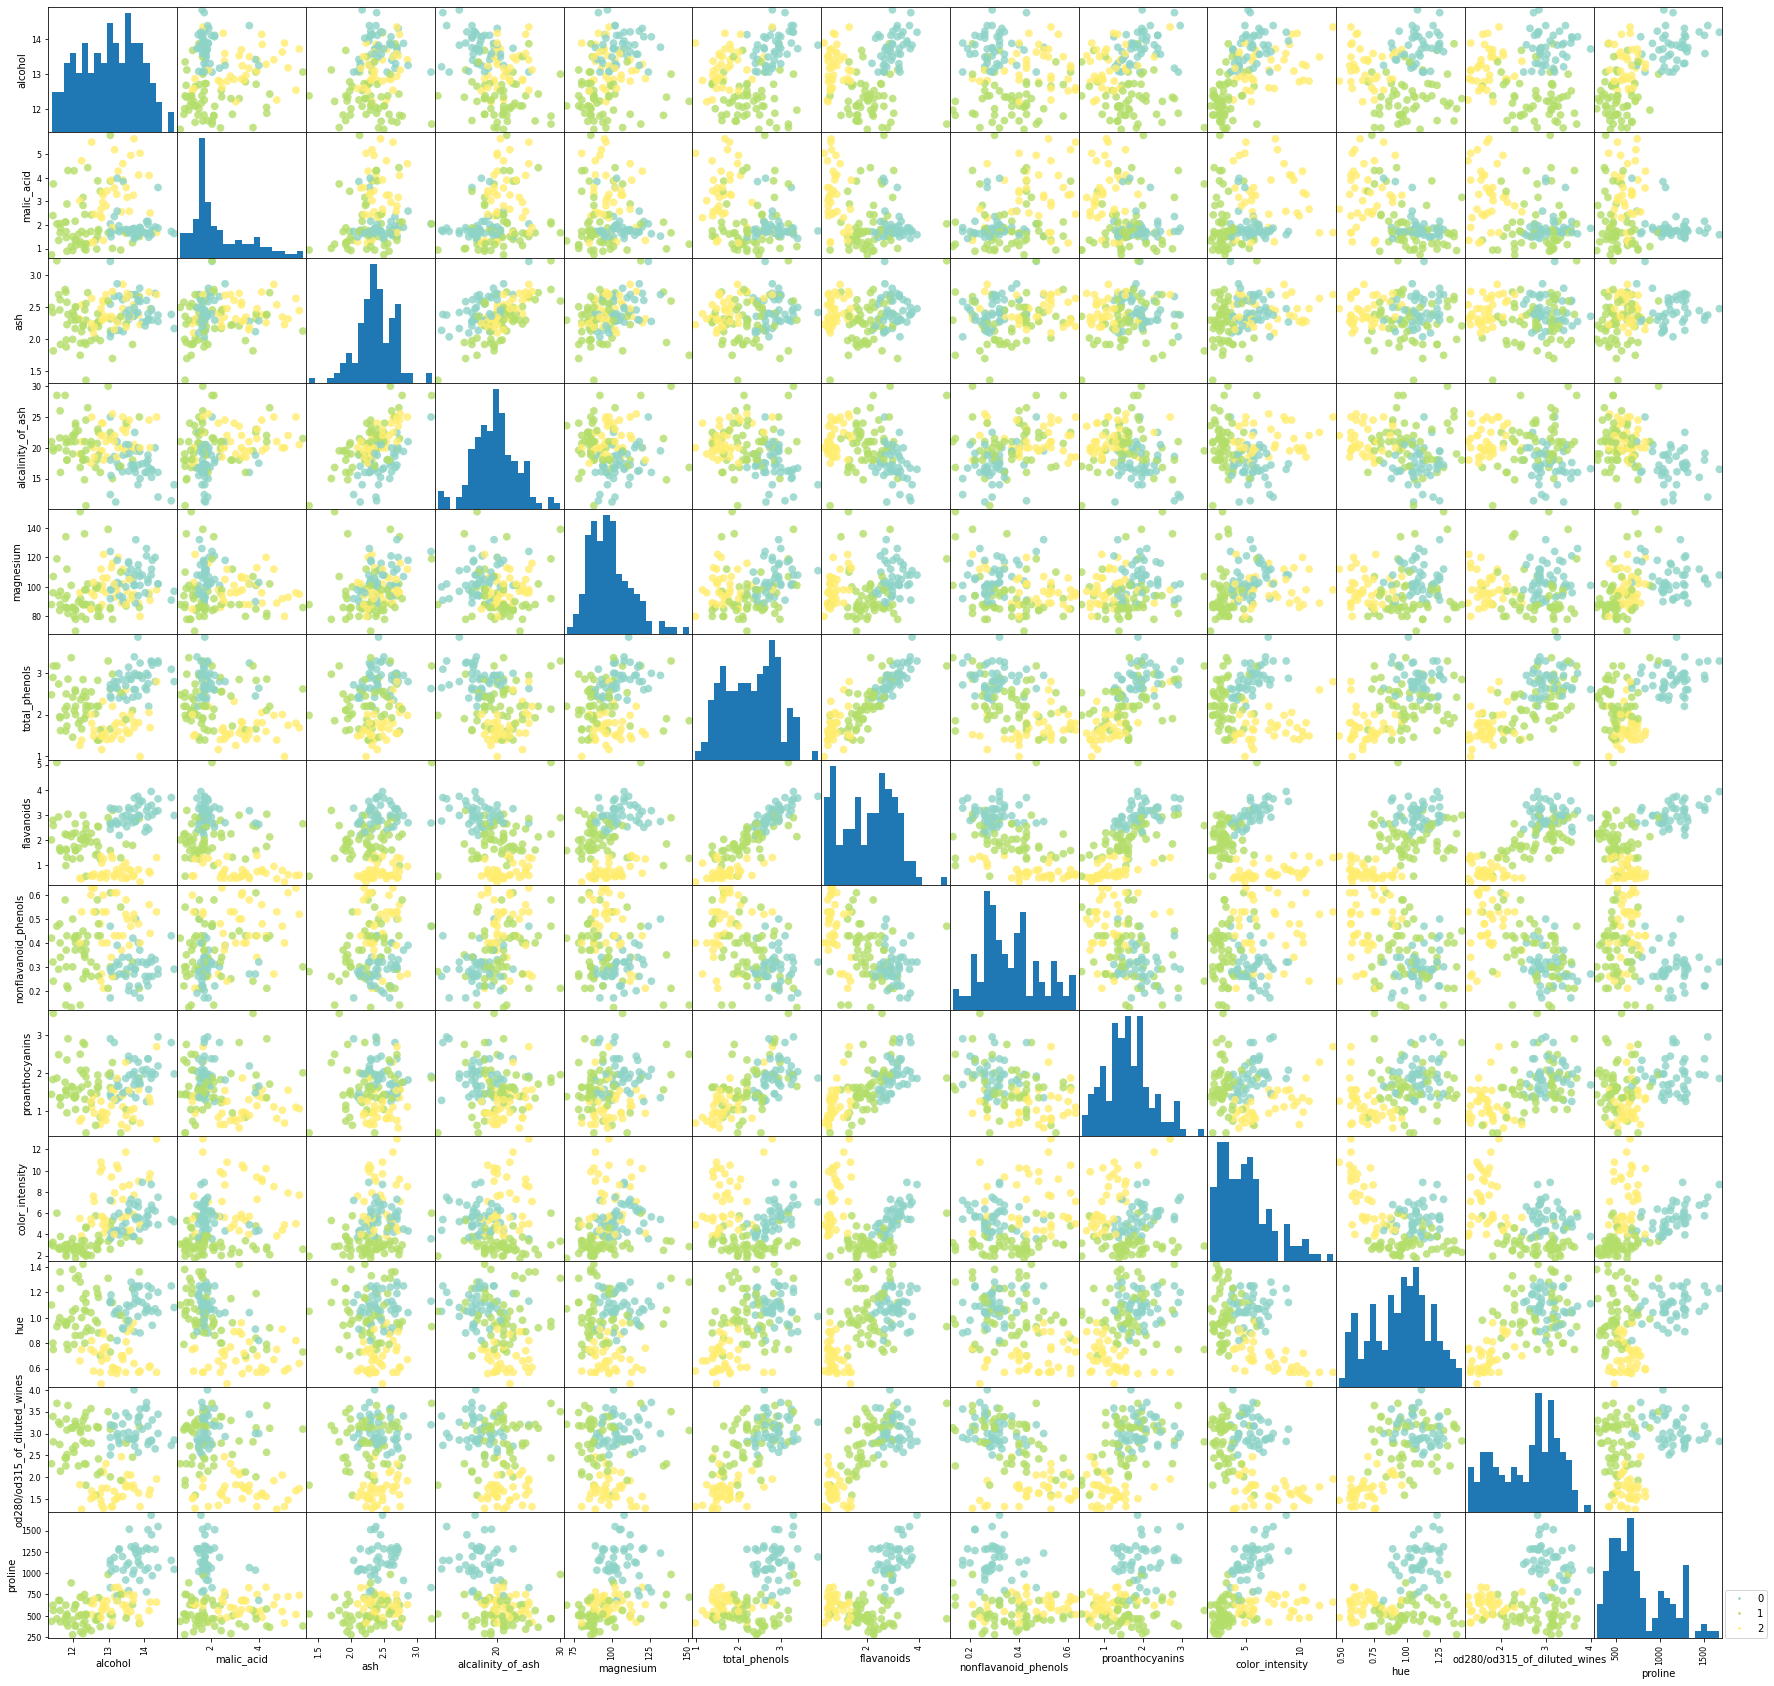

In [39]:
grr = pd.plotting.scatter_matrix(X_train, c=y_train, figsize=(30, 30),
                           marker='o', hist_kwds={'bins': 20}, s=60,
                           alpha=.8, cmap = 'Set3')
handles = [plt.plot([],[], color=plt.cm.Set3(i/2.), ls="", marker=".", \
                    markersize=np.sqrt(10))[0] for i in range(3)]
labels=np.unique(iris_dataset['target'])
plt.legend(handles, labels, loc=(1.02,0))
plt.show()

In [41]:
# !pip install seaborn
import seaborn as sns

<AxesSubplot:>

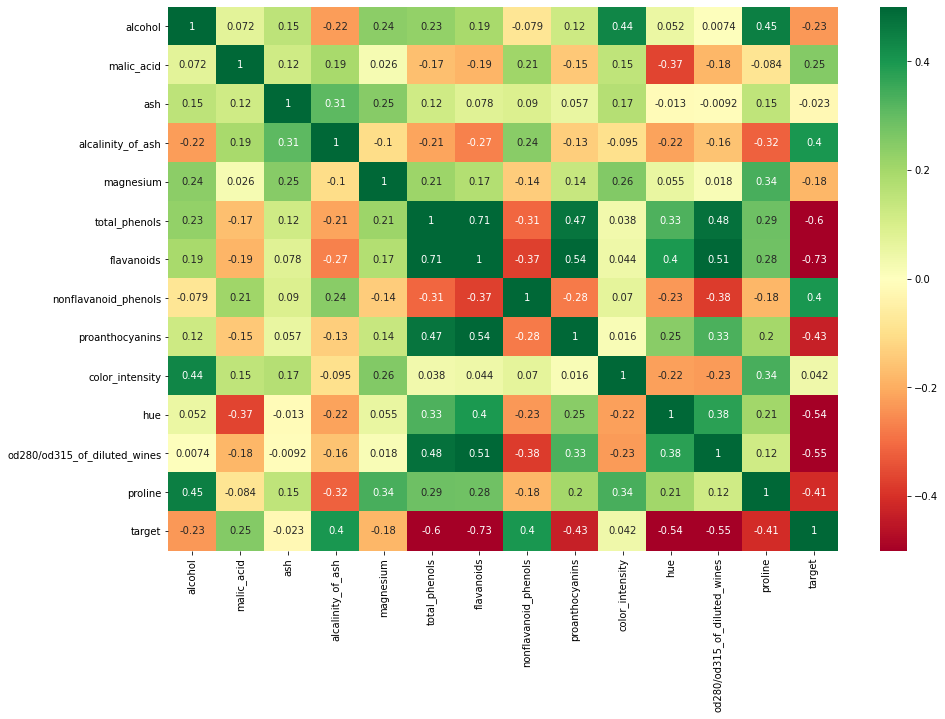

In [42]:
plt.figure(figsize = (15, 10))
sns.heatmap(
    X_train.merge(pd.Series(y_train, name='target', index=X_train.index),
                  left_index=True, right_index=True).corr(method='kendall'), 
    vmin=-0.5, vmax=0.5, cmap='RdYlGn', annot=True)

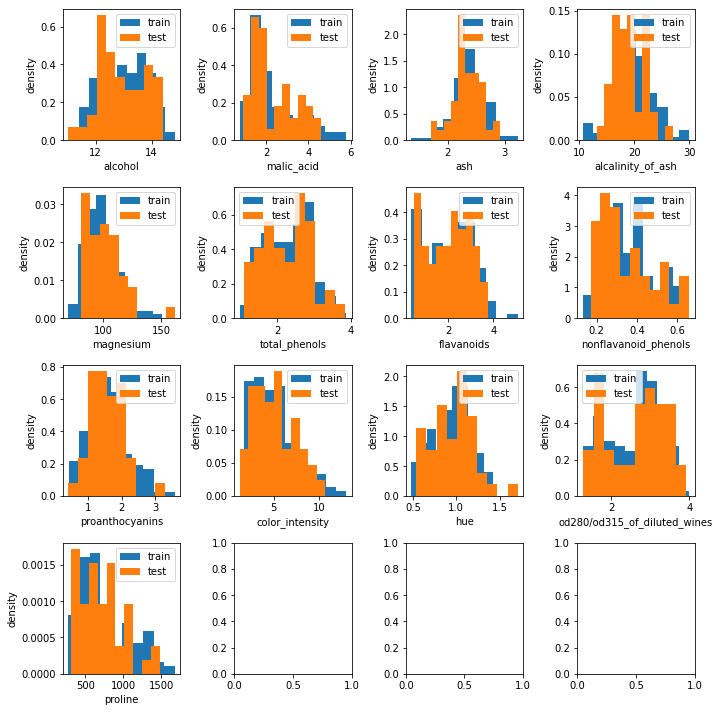

In [43]:
fig, axes = plt.subplots(4,4, figsize=(10,10))
for n, col in enumerate(wine_dataset.feature_names):
    j, i = n//4, n%4
    axes[j,i].hist(X_train[col], density = True, label='train')
    axes[j,i].hist(X_test[col], density = True, label='test')
    axes[j,i].set_xlabel(col)
    axes[j,i].set_ylabel('density')
    axes[j,i].legend()

plt.tight_layout()
plt.show()
plt.close()

There is comperetively high positive correlation between flavanoids and total_phenols (0.71), proanthocyanins and flavanoids (0.54), od280/od315_of_diluted_wines and flavanoids (0.51). By the way, the target variable is also somehow dependent on those features in a negative way. Hue is another highly correlated feature with the target, also negatively. Kendall rank correlation is used because the target is an ordered variable. 

From scatterplots:
Class 0 is almost lineary separable by proline (high values). Also class 2 is higly separable by the feature od280/od315_of_diluted_wines and  flavanoids (low values both). Class 1 - by alcohol (low values).

Histograms show that train and test sets are distibuted in a similar way. 

## Fit model

Lets try decision tree

In [44]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [45]:
y_pred = tree.predict(X_test)

In [46]:
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

Test set score: 0.91


Not bad, but can be better. Maybe we should try ensemble of a few decision trees?

In [47]:
from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier(n_estimators=5)
rf1.fit(X_train, y_train)
y_pred = rf1.predict(X_test)
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

Test set score: 0.98


Much better, almost perfect. Lets try increasing number of trees

In [48]:
rf2 = RandomForestClassifier(n_estimators=10)
rf2.fit(X_train, y_train)
y_pred = rf2.predict(X_test)
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

Test set score: 1.00


Wow, 100% match!)